## Explanatory Factor Analysis

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
df.dropna(inplace=True)

In [5]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax")

In [6]:
species_dict = {'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7}

In [7]:
df['Species'] = df['Species'].map(species_dict)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,7,12.2,11.5,12.2,13.4,2.0904,1.3936
155,7,13.4,11.7,12.4,13.5,2.4300,1.2690
156,7,12.2,12.1,13.0,13.8,2.2770,1.2558
157,7,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
df.drop(['Species'], axis=1)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
# Creates factor analyzer variable and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [12]:
df = df.dropna()

In [13]:
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [25]:
# gets the loadings
loadings = fa.loadings_

In [15]:
# get the Eigenvectors and Eigenvalues
ev, v = fa.get_eigenvalues()

In [16]:
# scree plot to see if 6 factors is enough
xvals = range(1, df.shape[1]+1)

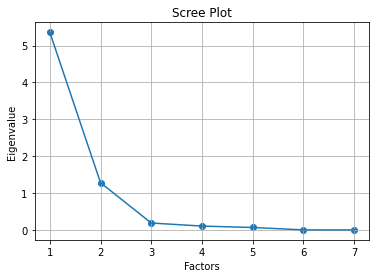

In [17]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [18]:
# the test shows that 3 factors explain most of the data

In [24]:
df.from_records(loadings)

,0,1,2,3,4,5
0,-0.019821,-0.996586,-0.036052,0.011023,-0.003433,0.0
1,0.862843,0.152758,0.224548,0.177576,0.381069,0.0
2,0.982313,0.077966,0.137250,0.085965,0.026604,0.0
3,0.979450,0.095213,0.142316,0.093322,0.027447,0.0
4,0.965983,0.187885,0.115290,0.121338,0.035138,0.0
5,0.504493,0.684176,0.262776,0.432445,0.127901,0.0
6,0.770087,0.282401,0.545430,0.131083,0.086989,0.0


In [20]:
# Get variance of each factors
fa.get_factor_variance()

(array([4.44982093, 1.61481064, 0.47064918, 0.26666796, 0.17184659,
        0.        ]),
 array([0.6356887 , 0.23068723, 0.0672356 , 0.03809542, 0.02454951,
        0.        ]),
 array([0.6356887 , 0.86637594, 0.93361154, 0.97170696, 0.99625647,
        0.99625647]))

In [21]:
# Loadings close to -1 or 1 indicate that the factor strongly influences the variable.
# Loadings close to 0 indicate that the factor has a weak influence on the variable